# **CIFAR-10 - Object Recognition in Images**

The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.  The provided files are:

train.7z - a folder containing the training images in png format
test.7z - a folder containing the test images in png format
trainLabels.csv - the training labels

To discourage certain forms of cheating (such as hand labeling) we have added 290,000 junk images in the test set. These images are ignored in the scoring. We have also made trivial modifications to the official 10,000 test images to prevent looking them up by file hash. These modifications should not appreciably affect the scoring. You should predict labels for all 300,000 images.

The label classes in the dataset are:
- airplane 
- automobile 
- bird 
- cat 
- deer 
- dog 
- frog 
- horse 
- ship 
- truck

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

datasets: https://www.kaggle.com/c/cifar-10/data


In [0]:
import keras
import numpy as np
from keras import datasets

In [0]:
print(keras.__version__)
print(numpy.__version__)

2.3.1
1.18.4


In [0]:
(x_train_all, y_train_all), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [0]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
LABEL_NAMES[y_train_all[1][0]]

'Truck'

In [0]:
print(x_train_all.shape)
print(y_train_all.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## EDA

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
VALIDATION_SIZE = .1
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=VALIDATION_SIZE, random_state=101)

In [0]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [0]:
y_val = keras.utils.to_categorical(y_val, 10)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
print(x_val.shape)
print(y_val.shape)

(5000, 32, 32, 3)
(5000, 10)


## Modeling

In [0]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), 
                                    keras.layers.MaxPooling2D(2, 2), 
                                    keras.layers.Conv2D(64, (3, 3), activation='relu'), 
                                    keras.layers.MaxPooling2D(2, 2), 
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(256, activation='relu'), 
                                    keras.layers.Dropout(.2), 
                                    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               590080    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data Augmentation

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_datagen.fit(x_train)

## Model Evaluation

In [0]:
# import tensorflow as tf

# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('val_acc')>0.45):
#       print("\nReached 45.0% accuracy so cancelling training!")
#       self.model.stop_training = True

In [0]:
history = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=32), epochs=100,
                              validation_data=train_datagen.flow(x_val, y_val))
model.evaluate(x_val, y_val, verbose=0)

Epoch 1/100
1407/1407 [==============================] - 39s 28ms/step - loss: 1.9676 - acc: 0.2796 - val_loss: 1.7238 - val_acc: 0.3522
Epoch 2/100
1407/1407 [==============================] - 38s 27ms/step - loss: 1.7807 - acc: 0.3513 - val_loss: 1.5601 - val_acc: 0.3808
Epoch 3/100
1407/1407 [==============================] - 38s 27ms/step - loss: 1.7039 - acc: 0.3810 - val_loss: 1.6799 - val_acc: 0.4042
Epoch 4/100
1407/1407 [==============================] - 38s 27ms/step - loss: 1.6583 - acc: 0.3984 - val_loss: 1.0364 - val_acc: 0.4226
Epoch 5/100
1407/1407 [==============================] - 38s 27ms/step - loss: 1.6224 - acc: 0.4140 - val_loss: 1.1320 - val_acc: 0.4258
Epoch 6/100
1407/1407 [==============================] - 38s 27ms/step - loss: 1.5921 - acc: 0.4265 - val_loss: 0.9500 - val_acc: 0.4608
Epoch 7/100
1407/1407 [==============================] - 39s 27ms/step - loss: 1.5618 - acc: 0.4417 - val_loss: 0.9924 - val_acc: 0.4538
Epoch 8/100
1407/1407 [==================

[1.0740630367279054, 0.6308000087738037]

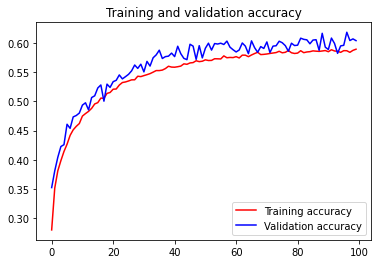

<Figure size 432x288 with 0 Axes>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

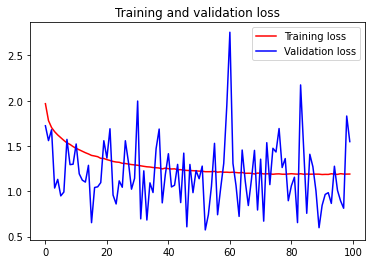

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0846264399528502
Test accuracy: 0.6207000017166138


In [0]:
pred = model.predict(x_test)
Y_pred_classes = np.argmax(pred, axis=1) 
Y_true = np.argmax(y_test, axis=1)

errors = (Y_pred_classes - Y_true != 0)
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

print(Y_pred_classes)
print(Y_true)

[3 1 8 ... 7 1 7]
[3 8 8 ... 5 1 7]


In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(Y_true, Y_pred_classes))
# LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1000
           1       0.76      0.71      0.74      1000
           2       0.78      0.35      0.48      1000
           3       0.60      0.29      0.39      1000
           4       0.68      0.43      0.53      1000
           5       0.59      0.54      0.56      1000
           6       0.50      0.86      0.63      1000
           7       0.58      0.76      0.66      1000
           8       0.82      0.72      0.77      1000
           9       0.49      0.89      0.63      1000

    accuracy                           0.62     10000
   macro avg       0.66      0.62      0.61     10000
weighted avg       0.66      0.62      0.61     10000



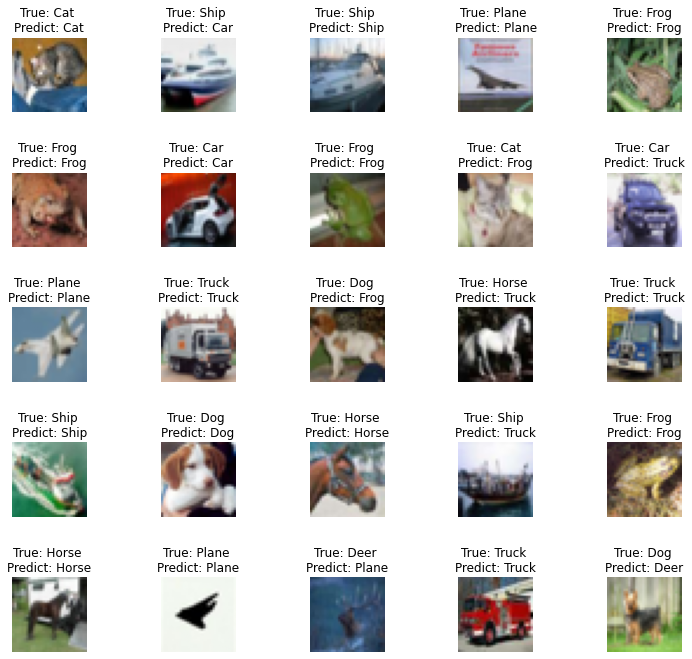

In [0]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (LABEL_NAMES[Y_true[i]], LABEL_NAMES[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)